# Veri Setinin Alınması ve Analizi

## Drive bağlanması

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gerekli modüller ve değişkenler
Numpy, pandas, librosa ve os modüllerinin deftere dahil edilmesi ve verileri okumak ve etiketlemek için kullanılacak değişkenlerin tanımlanması yapıldı.

In [ ]:
import os
import numpy as np
import librosa as lb
dataset_path = r"/content/drive/MyDrive/Bitirme/Uygulama/Datasets/RAVDESS/Audio_Speech_Actors_01-24"

emotion = { "01" : "neutral", "02" : "calm", "03" : "happy", "04" : "sad",
           "05" : "angry", "06" : "fear", "07" : "disgust", "08" : "ps"} # Duygular
#emo_intensity = {"01" : "normal", "02" : "strong"} # Duyguların yoğunluğu

## Veri seti
Ortama alınması ve numpy dosyası olarak kayıt işlemleri gerçekleştirildi. Kayıt etmemin amacı yeniden başlanacağı zaman tekrardan dosyaların okunup tekrardan etiketleme işlemlerini yapmamaktır.

In [ ]:
data = []
labels = []
lenght_data = []
for actor in os.listdir(dataset_path):# Actor dizinlerini gezinmek için
  actor_path = os.path.join(dataset_path, actor)
  for audio_path in os.listdir(actor_path): # Dizinlerdeki ses dosyalarının adlarını almak için
    data_path = os.path.join(actor_path, audio_path) # Ses dosyasının yolunun oluşturulması.
    out, sr= lb.load(data_path,sr=None) # out ses sinyalinin, sr örnekleme hızı değerini tutan değişkenler
    data.append(out)
    # RAVDESS veri setinde etiketler dosya adında olduğundan dosya adından duygu numarası alındı.
    labels.append(emotion[audio_path.split("-")[2]])
    lenght_data.append(len(out))

In [ ]:
min_len = min(lenght_data)-min(lenght_data)%100
shape_data = []
for i in shape_data:
  shape_data.append(list(i[0:min_len]))
shape_data = np.array(shape_data)
shape_data.shape

(1440, 140900)

In [ ]:
# Veri setinin kayıt işlemi, Dataset dizininde data.npy ve labels.npy olarak kayıt edildi.
# Sonraki kodlarda bu iki dosya direk yüklenerek kullanılacaktır.
save_path = r"/content/drive/MyDrive/Bitirme/Uygulama/Datasets/RAVDESS/"
np.save(save_path+"data.npy",shape_data)
np.save(save_path+"labels.npy",labels)

## Analiz

### Analiz için ses dosyalarının okunması 
Analiz için seçilen ses dosyaları burada ayrı bir list değişkenine atandı ve analiz işlemleri bu dosyalar üzerinden yapıldı. Sağlıklı olması açısından bir erkek bir kadın ait 8 duygu alınmıştır.

In [ ]:
analiz_path = "/content/drive/MyDrive/Bitirme/Uygulama/Datasets/RAVDESS/Analysis"
audio_data = []
for file_name in os.listdir(analiz_path):
  file_path = os.path.join(analiz_path, file_name)
  data, sr = lb.load(file_path, sr = None)
  emo = file_name.split("-")[2]
  gender = "Female"
  if int(file_name.replace(".wav","").split("-")[6])%2:
    gender = "Male" 
  audio_data.append([data,sr,emotion[emo],gender])

### Cinsiyet Dağılımı


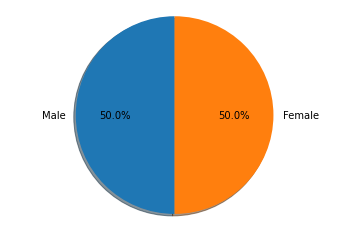

In [ ]:
import matplotlib.pyplot as plt

labels = 'Male', 'Female'
sizes = [720,720]
explode = [0,0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Aktör Dağılımı

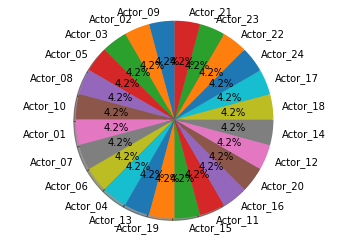

In [ ]:
labels = 'Male', 'Female'
sizes = []
explode = []
for i in range(24):
  sizes.append(60)
  explode.append(0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=os.listdir(dataset_path), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Audio Ploting
Sesi Zaman/Ses genliği olarak çizdirilmesi.

In [ ]:
audio_data[0]

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 48000, 'neutral', 'Male']

In [ ]:
def audio_plot(time, sinyal, string, emotion):
  plt.figure(figsize=(14,5))
  fig, ax = plt.subplots()
  ax.plot(time, sinyal)
  ax.set(xlabel='Zaman (s)', ylabel='Sesin Genliği', title= str(string)+" "+str(emotion))
  plt.show()

<Figure size 1008x360 with 0 Axes>

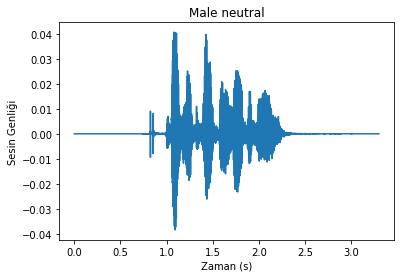

<Figure size 1008x360 with 0 Axes>

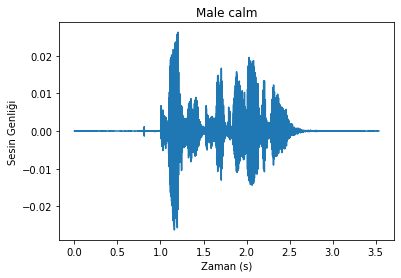

<Figure size 1008x360 with 0 Axes>

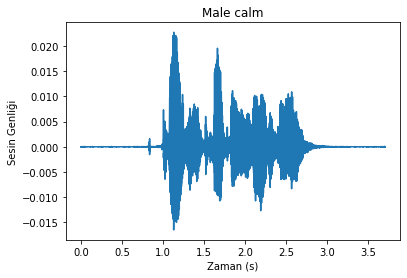

<Figure size 1008x360 with 0 Axes>

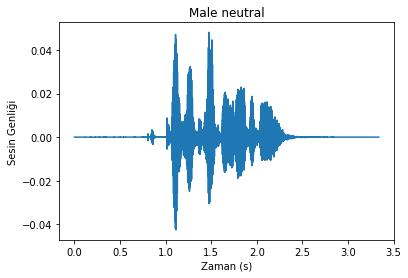

<Figure size 1008x360 with 0 Axes>

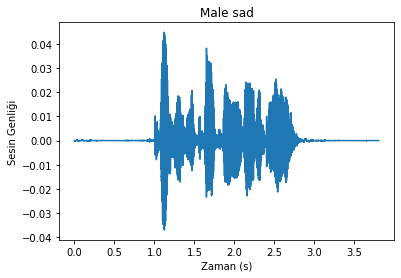

<Figure size 1008x360 with 0 Axes>

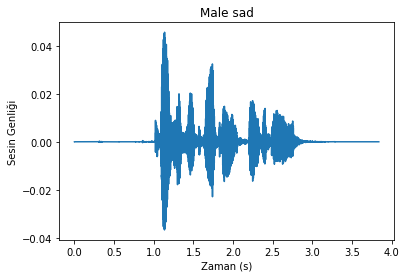

<Figure size 1008x360 with 0 Axes>

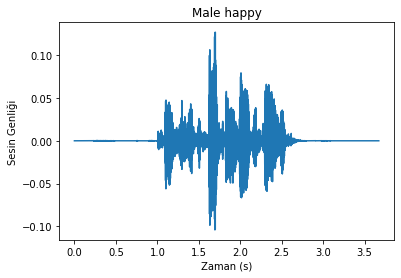

<Figure size 1008x360 with 0 Axes>

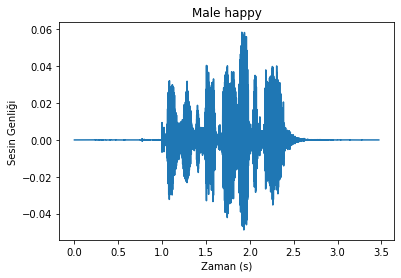

<Figure size 1008x360 with 0 Axes>

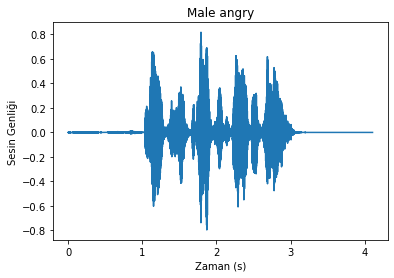

<Figure size 1008x360 with 0 Axes>

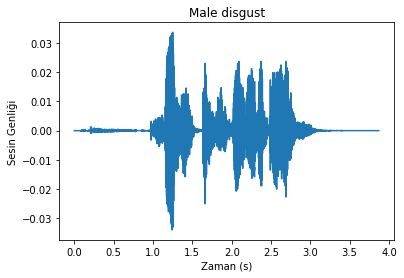

<Figure size 1008x360 with 0 Axes>

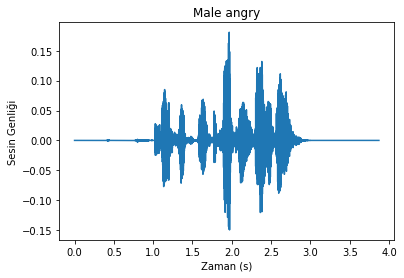

<Figure size 1008x360 with 0 Axes>

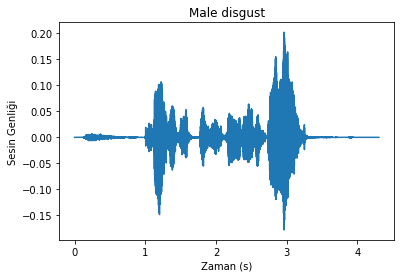

<Figure size 1008x360 with 0 Axes>

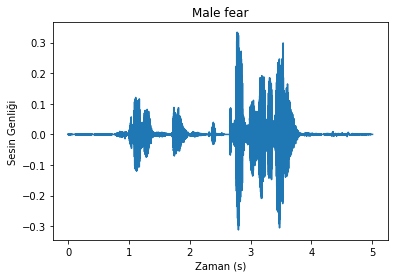

<Figure size 1008x360 with 0 Axes>

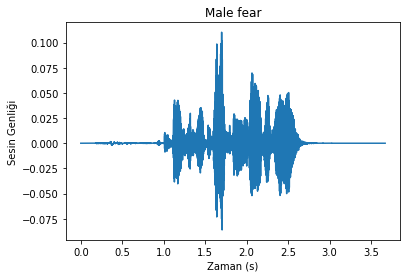

<Figure size 1008x360 with 0 Axes>

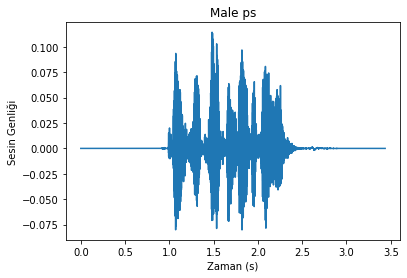

<Figure size 1008x360 with 0 Axes>

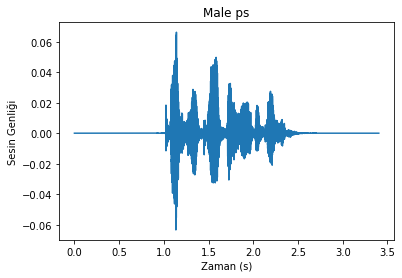

<Figure size 1008x360 with 0 Axes>

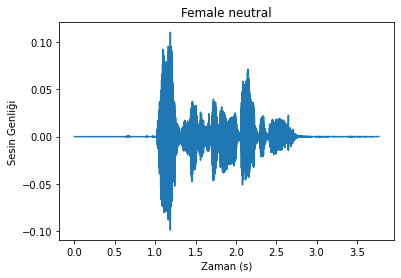

<Figure size 1008x360 with 0 Axes>

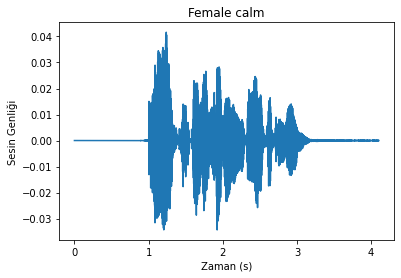

<Figure size 1008x360 with 0 Axes>

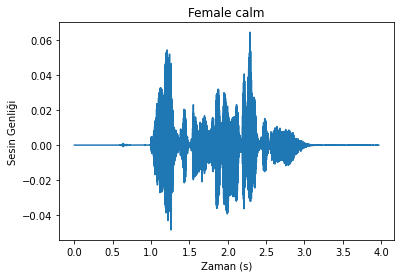

<Figure size 1008x360 with 0 Axes>

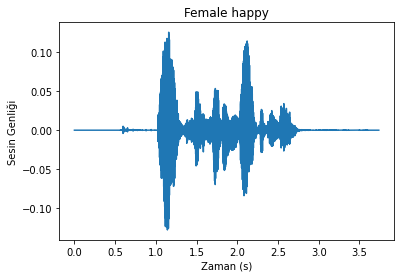

<Figure size 1008x360 with 0 Axes>

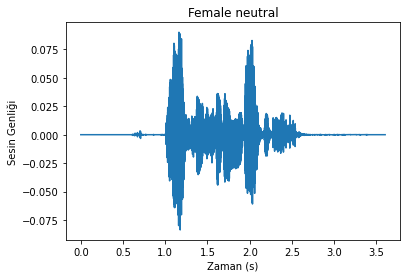

<Figure size 1008x360 with 0 Axes>

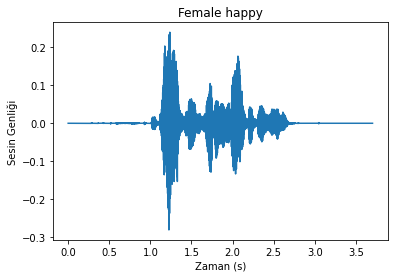

<Figure size 1008x360 with 0 Axes>

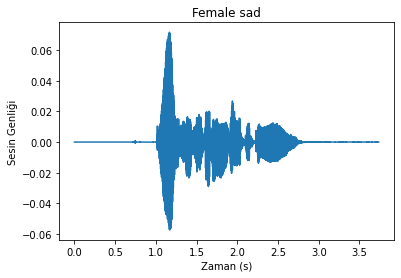

<Figure size 1008x360 with 0 Axes>

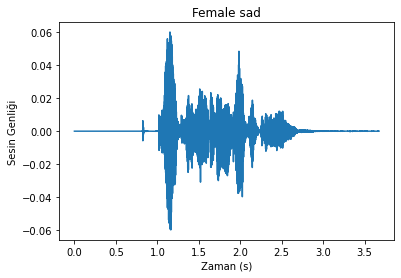

<Figure size 1008x360 with 0 Axes>

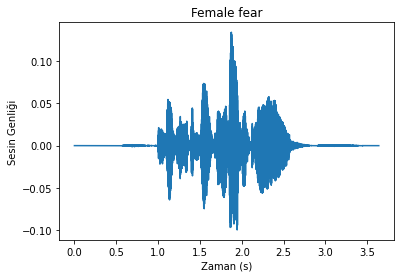

<Figure size 1008x360 with 0 Axes>

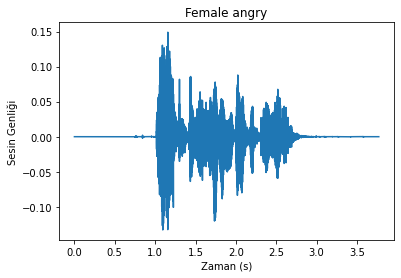

<Figure size 1008x360 with 0 Axes>

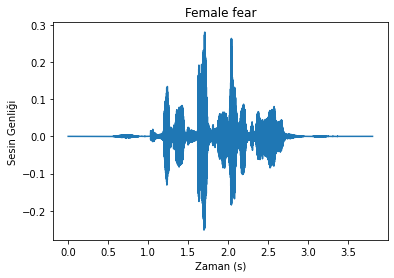

<Figure size 1008x360 with 0 Axes>

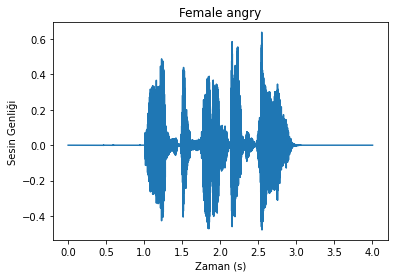

<Figure size 1008x360 with 0 Axes>

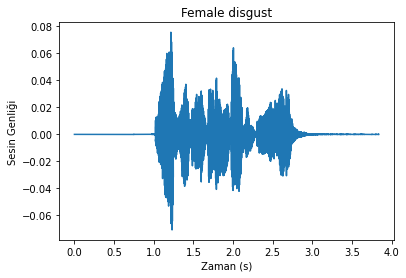

<Figure size 1008x360 with 0 Axes>

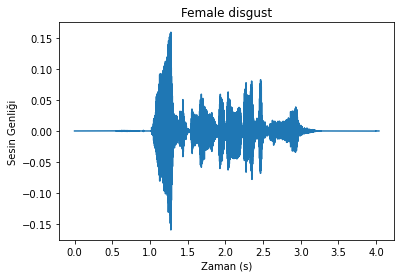

<Figure size 1008x360 with 0 Axes>

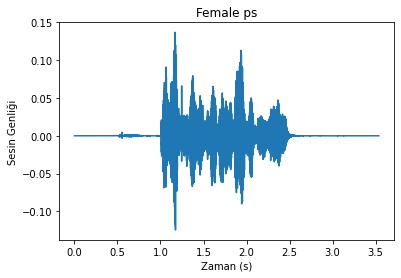

<Figure size 1008x360 with 0 Axes>

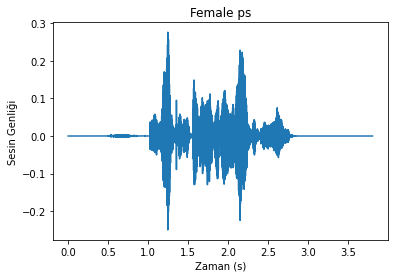

In [ ]:
# Ses için zaman çizelgesi oluşturuldu.
# Sinyal boyutunu örnekleme hızına bölerek elde edilir.

for veri in audio_data:
  time = np.arange(0,veri[0].shape[0])/sr
  audio_plot(time,veri[0],veri[3],veri[2])

### Sesin Temposu
Sesin tahmini temposunu bulma ve çizdirme adımları

In [ ]:
fm_happy=audio_data[0]
m_happy=audio_data[6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until


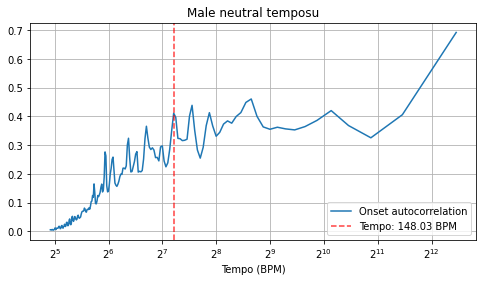

In [ ]:
onset_env = lb.onset.onset_strength(fm_happy[0], sr=sr)
tempo = lb.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = np.asscalar(tempo)
hop_length = 512
ac = lb.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = lb.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)

plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], lb.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title(fm_happy[-1]+' '+fm_happy[-2]+' temposu')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

### Ses Perdesi(Audio Pitch)
Bir frekansın hissi genellikle bir sesin perdesi olarak adlandırılır. Yüksek perdeli bir ses, yüksek frekanslı bir ses dalgasına ve düşük perdeli bir ses düşük frekanslı bir ses dalgasına karşılık gelir.

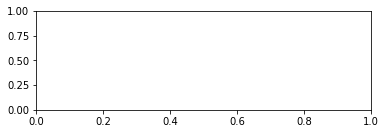

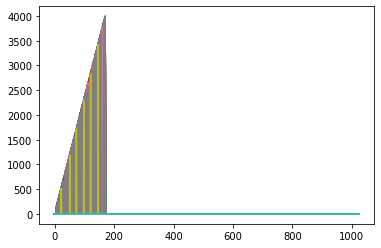

In [ ]:
pitches, magnitudes = lb.piptrack(y=fm_happy[0], sr=sr)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

### Mel ölçekli bir spektrogram
MelSpectrogram türündeki bir nesne, bir sesin akustik zaman frekansı gösterimini temsil eder

In [ ]:
from librosa.display import specshow

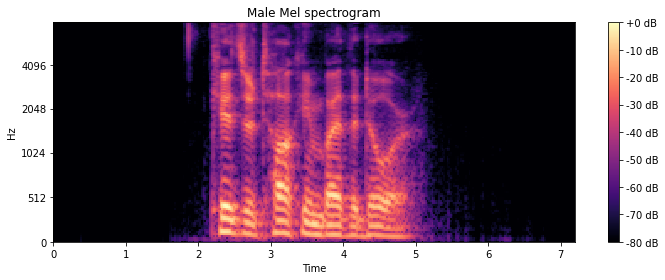

In [ ]:
lb.feature.melspectrogram(y=fm_happy[0], sr=sr)

D = np.abs(lb.stft(fm_happy[0]))**2
S = lb.feature.melspectrogram(S=D)
S = lb.feature.melspectrogram(y=fm_happy[0], sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
specshow(lb.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(fm_happy[-1]+' Mel spectrogram')
plt.tight_layout()
plt.show()